# Linear Algebra
## Matrix Rank

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Rank: concepts, terms, and applications
The **rank** of a matrix is a **single number** that provides insight into the amount of **information** that is contained in the matrix. A rank is related to the dimensionality of information contained in the matrix.

Six important things to know about matrix rank:
1. Terminology:
    - $r\ \text{or} \ rank( A)$
    - Rank is a non-negative integer.


2. Maximum possible rank: 
    - $max(r) = min(m,n)$
    - $r\in \mathbb{N} ,\ s.t.\ \ \ 0\leq r\leq min\{m,n\}$


3. Rank is a property of the matrix, not columns or rows.
    - $rank(C(A))$
    - $rank(R(A))$


4. More terminology:

$$
 \begin{array}{l}
rank\left(\underset{m\times m}{A}\right) =m\ \ \ \Rightarrow \ \ \ \text{"Full rank matrix"}\\
\\
rank\left(\underset{m >n}{A}\right) =n\ \ \ \ \Rightarrow \ \ \ \text{"Full column matrix"}\\
\\
rank\left(\underset{m< n}{A}\right) =m\ \ \ \Rightarrow \ \ \ \text{"Full row matrix"}\\
\\
rank\left(\underset{m\times n}{A}\right) < m,n\ \ \ \Rightarrow \ \ \ \text{"Reduced rank"
"Rank deficient"
"Degenerate"
"Low-rank"
"Singular"
"Loser"
"Dummy"}
\end{array}
$$


5. Rank = dimensionality of information.


6. The rank of a matrix is the **largest number of columns** (or rows) that can form a **linearly independent set**.

## Computing matrix rank: theory and practice
Methods to compute rank:
1. Count the number of columns in a linearly independent set.
    - By visual inspection and a bit of guesswork.
    - By applying methods used to solve systems of simultaneous linear equations.
2. Apply row reduction to reduce matrix to echelon form, and count the number of pivots.
    - Tedious and time-consuming for large matrices or matrices with decimal entries.
3. Compute the Singular Value Decomposition (SVD) and count the number of non-zero singular values.
4. Compute the Eigendecomposition and count the number of non-zero eigenvalues.



In [2]:
# Size
m = 4
n = 6

# Create a random matrix
A = np.random.randn(m, n)
# print(np.round(A, 2))

# What is the largest possible rank? 𝑚𝑎𝑥(𝑟)=𝑚𝑖𝑛(𝑚,𝑛)
ra = np.linalg.matrix_rank(A)
print(f"Rank matrix A = {ra}")

# Set last column to be repeat of penultimate column
B = A
B[:,-1] = B[:,-2]
# print(np.round(B, 2))

rb = np.linalg.matrix_rank(B)
print(f"Rank matrix B = {rb}")

# Set last row to be repeat of penultimate row
B[-1,:] = B[-2,:]
# print(np.round(B, 2))

rb2 = np.linalg.matrix_rank(B)
print(f"Rank matrix B = {rb2}")

Rank matrix A = 4
Rank matrix B = 4
Rank matrix B = 3


In [3]:
# Adding noise to a rank-deficient matrix
# Square matrix
A = np.round(10*np.random.randn(m, m))

# Reduce the rank
A[:,-1] = A[:,-2]

# Noise level
noiseamp = .000001

# Add the noise
B = A + noiseamp*np.random.randn(m, m)

print(f"Rank w/o noise =  {np.linalg.matrix_rank(A)}")
print(f"Rank with noise = {np.linalg.matrix_rank(B)}")

Rank w/o noise =  3
Rank with noise = 4


## Rank of added and multiplied matrices
Rank of $A + B$: the rule

$
 \begin{array}{l}
rank( A+B) \leq rank( A) +rank( B)\\
\\
\text{Example:}\\
\begin{bmatrix}
1 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & 0
\end{bmatrix} +\begin{bmatrix}
0 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0
\end{bmatrix}
\end{array}
$

Rank of $AB$: the rule

$
 \begin{array}{l}
rank( AB) \leq min\{rank( A) ,rank( B)\}\\
AB=C\\
Ab_{j} =c_{j} \ \ \ \ \ \Rightarrow \ \ \ \ \ rank( C) \leq rank( A)\\
a_{i} B=c_{i} \ \ \ \ \ \Rightarrow \ \ \ \ \ rank( C) \leq rank( B)
\end{array}
$

## Create reduced-rank matrices using matrix multiplication
1. Create a 10x10 matrix with rank = 4 (use matrix multiplication).
2. Generalize the procedure to create any MxN with rank r.

**Note:** the maximum possible rank of a matrix is the smallest M or N (rows or columns).

In [4]:
# 1. Create a 10x10 matrix with rank = 4 (use matrix multiplication)
m = 10 # Matrix size
A = np.round(np.random.randn(m, m), 1)
b = np.round(np.array([1,1,1,1,0,0,0,0,0,0]))

Ar = A.copy()
Ar = A*b
# print(f"Rank: {np.linalg.matrix_rank(Ar)}")

# Another way to solve it
A = np.random.randn(10, 4) # MxN
B = np.random.randn(4, 10) # NxM
C = A@B # MxM

print(f"Matrix shape: {C.shape}")
print(f"Rank: {np.linalg.matrix_rank(C)}\n")

# 2. Generalize the procedure to create any MxN with rank r
m = 8
n = 47
r = 3

A = np.random.randn(m, r)
B = np.random.randn(r, n)
C = A@B

print(f"Matrix shape: {C.shape}")
print(f"Rank: {np.linalg.matrix_rank(C)}")

Matrix shape: (10, 10)
Rank: 4

Matrix shape: (8, 47)
Rank: 3


## Code challenge: scalar multiplication and rank
Test whether the matrix rank is invariant to scalar multiplication.

$rank(A) \neq rank(l\times A)$

1. Create two matrices: full-rank and reduced-rank (random)
2. Create some scalar
3. Display ranks of matrices $F, R, l\times F, l\times R$
4. Check whether $rank(l\times F) = l\times rank(F)$

In [5]:
# 1. Create two matrices: full-rank and reduced-rank (random)
m = 6
n = 4

F = np.random.randn(m, n)*np.random.randn(n)
R = np.random.randn(m, n-1)@np.random.randn(n-1, n)
np.linalg.matrix_rank(R)


# 2. Create some scalar
l = 123456

# 3. Display ranks of matrices F, R, l*F, l*R
print(f"Rank F:   {np.linalg.matrix_rank(F)}")
print(f"Rank l*F: {np.linalg.matrix_rank(l*F)}")
print(f"Rank R:   {np.linalg.matrix_rank(R)}")
print(f"Rank l*R: {np.linalg.matrix_rank(l*R)}\n")


# 4. Check whether rank(l*F) == l*rank(F)
print(f"rank(l*F) == l*rank(F): {np.linalg.matrix_rank(l*F) == l*np.linalg.matrix_rank(F)}")

Rank F:   4
Rank l*F: 4
Rank R:   3
Rank l*R: 3

rank(l*F) == l*rank(F): False


## Rank of $A^{T}A$ and $AA^{T}$
$$\large
rank(A) = rank(A^T A) = rank(A^T) = rank(AA^T)
$$

**Explanation #1**

$
 \begin{array}{l}
A^{T} A=C\\
A^{T} a_{j} =c_{j}\\
\text{Columns} \ c_{j} \ \text{are combinations of columns in} \ A^{T}\\
\Rightarrow \ C( C) =C\left( A^{T}\right)\\
\Rightarrow \ rank( C) =rank\left( A^{T}\right)
\end{array}
$

**Explanation #2**

$
 \begin{array}{l}
Ax=0\\
A^{T} Ax=0\\
\Rightarrow \ N( A) =N\left( A^{T} A\right)\\
dim( N( A)) =dim\left( N\left( A^{T} A\right)\right)\\
\Rightarrow \ rank( C) =rank( A)
\end{array}
$

**Explanation #3**

$
 \begin{array}{l}
A=U\Sigma V^{T}\\
A^{T} A=\left( U\Sigma V^{T}\right)^{T} U\Sigma V^{T}\\
A^{T} A=V\Sigma U^{T} U\Sigma V^{T}\\
A^{T} A=V\Sigma ^{2} V^{T}
\end{array}
$

<br>

Summary:
$rank(A) = rankA^T A$
1. $A^T A$ spans the same space as $A$.
2. $A^T A$ has the same dimensionality as $A$.
3. $A^T A$ has the same singular values (squared) as $A$.

In [6]:
# matrix sizes
m = 14
n = 3

# create matrices
A = np.round( 10*np.random.randn(m,n) )

AtA = A.T@A
AAt = A@A.T

# get matrix sizes
sizeAtA = AtA.shape
sizeAAt = AAt.shape

# print info!
print(f'AtA: {sizeAtA[0]}x{sizeAtA[1]}, rank={np.linalg.matrix_rank(AtA)}')
print(f'AAt: {sizeAAt[0]}x{sizeAAt[1]}, rank={np.linalg.matrix_rank(AAt)}')

AtA: 3x3, rank=3
AAt: 14x14, rank=3


## Code challenge: rank of multiplied and summed matrices
Rules:

$
 \begin{array}{l}
rank( AB) \leq min\{rank( A) ,rank( B)\}\\
\\
rank(A+B) \leq rank(A) +rank(B)
\end{array}
$


1. Generate two matrices (A and B), $2\times 5$
2. Compute $A^T A$ and $B^T B$
3. Find their ranks
4. Find ranks of $A^T A$ and $B^T B$

In [7]:
# 1. Generate two matrices
m, n = 2, 5
A = np.random.randn(m, n)
B = np.random.randn(m, n)
print(f"Rank A: {np.linalg.matrix_rank(A)}")
print(f"Rank B: {np.linalg.matrix_rank(B)}")

# 2. Compute AtA and BtB
AtA = A.T@A
BtB = B.T@B

# 3. Find their ranks
rA = np.linalg.matrix_rank(AtA)
rB = np.linalg.matrix_rank(BtB)
print(f"Rank AtA: {rA}")
print(f"Rank BtB: {rB}")

# 4. Find ranks of AtA and BtB using the rules
mul = np.linalg.matrix_rank(AtA @ BtB)
add = np.linalg.matrix_rank(AtA + BtB)
print(f"Rank AtA @ BtB: {mul}")
print(f"Rank AtA + BtB: {add}")

Rank A: 2
Rank B: 2
Rank AtA: 2
Rank BtB: 2
Rank AtA @ BtB: 2
Rank AtA + BtB: 4


## Making matrix full-rank by "shifting"
Full-rank matrices are great to work with, but rank-deficient matrices occur often in real data.

- See the effects of "shifting" a matrix by $\lambda I$.
- Appreciate the difficulty of knowing the right amount of shifting.

**"Shifting" a matrix: definition**

$
 \begin{array}{l}
\tilde{A} =A+\lambda I\\
\\
\text{Example 1:}\\
\underset{r=0}{\begin{bmatrix}
0 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & 0
\end{bmatrix}} +\underset{r=3}{\begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{bmatrix}} =\underset{r=3}{\begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{bmatrix}}\\
\\
\text{Example 2:}\\
\underset{r=2}{\begin{bmatrix}
1 & 3 & -19\\
5 & -7 & 59\\
-5 & 2 & 24
\end{bmatrix}} +0.1\underset{r=3}{\begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{bmatrix}} =\underset{r=3}{\begin{bmatrix}
1.01 & 3 & -19\\
5 & -6.99 & 59\\
-5 & 2 & -23.99
\end{bmatrix}}
\end{array}
$

- Where $I$ = identity matrix (1s in the diagonal, 0s in the off-diagonal).
- $A$ is a square matrix

rank(w/o shift) = 29
rank(with shift) = 30



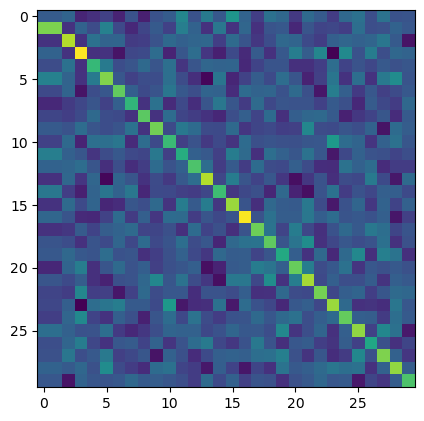

In [8]:
# Size of matrix
m = 30

# Create the square symmetric matrix
A = np.random.randn(m,m)
A = np.round(10 * A.T@A)

# Reduce the rank
A[:,0] = A[:,1]

# Shift amount (l=lambda)
l = .01

# New matrix
B = A + l*np.eye(m,m)

# Print information
print(f'rank(w/o shift) = {np.linalg.matrix_rank(A)}')
print(f'rank(with shift) = {np.linalg.matrix_rank(B)}\n')

# Ploting matrix
plt.figure(figsize=(5,5), dpi=100)
plt.imshow(B)
plt.show()

## Code challenge: is this vector in the span of this set?
Determine whether this vector:

$
v=\begin{bmatrix}
1 & 2 & 3 & 4
\end{bmatrix}
$

is in the span of these sets:

$
 \begin{array}{l}
S\ =\ \begin{bmatrix}
4 & 3 & 6 & 2\\
0 & 4 & 0 & 1
\end{bmatrix}\\
\\
T\ =\ \begin{bmatrix}
1 & 2 & 2 & 2\\
0 & 0 & 1 & 2
\end{bmatrix}
\end{array}
$

In [9]:
# Create vector and matrices
v = np.array([[1, 2, 3, 4]]).T
S = np.array([[4, 3, 6, 2], [0, 4, 0, 1]]).T
T = np.array([[1, 2, 2, 2], [0, 0, 1, 2]]).T

# Vector and Matrix rank
print(f"Rank v: {np.linalg.matrix_rank(v)}")
print(f"Rank S: {np.linalg.matrix_rank(S)}\n")
print(f"Rank T: {np.linalg.matrix_rank(T)}\n")
      
Sv = np.concatenate((S, v), axis=1)
Tv = np.concatenate((T, v), axis=1)
print(f"S concatenate v:\n{Sv}\n")
print(f"T concatenate v:\n{Tv}\n")

# Rank of matrices Sv and Tv
print(f"Rank Sv: {np.linalg.matrix_rank(Sv)}")
print(f"Rank Tv: {np.linalg.matrix_rank(Tv)}")

Rank v: 1
Rank S: 2

Rank T: 2

S concatenate v:
[[4 0 1]
 [3 4 2]
 [6 0 3]
 [2 1 4]]

T concatenate v:
[[1 0 1]
 [2 0 2]
 [2 1 3]
 [2 2 4]]

Rank Sv: 3
Rank Tv: 2


## Bonus Code
### Recursion

In [10]:
# Fibonacci
def fib(n: int) -> list:
    """
    n: number of iterations for the fibonacci sequence
    """
    nums = [0, 1]
    a, b = 0, 1
    for i in range(n-2):
        a, b = b, a+b
        nums.append(b)
    return nums

fibo = fib(n=10)
print(*fibo, sep=', ')
print(fibo[-1])

0, 1, 1, 2, 3, 5, 8, 13, 21, 34
34


In [11]:
# Recursion
def fibo(n):
    if n <= 1:
        return 1
    return fibo(n-1) + fibo(n-2)

fibo(n=8)

34

In [12]:
# Recursion
def fact(n):
    if n <= 1:
        return 1
    return n * fact(n-1)

fact(n=5)

120

In [13]:
f = 1
n = 5
for i in range(n-1, 0, -1):
    f += f*i
print(f)

120
